In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# 1.1A-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

signal_df = pd.read_csv('/content/drive/MyDrive/dataset/Part-+1%2C2%263+-+Signal.csv')

In [ ]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
signal_df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
signal_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 1.1B-

missing_values = signal_df.isnull().sum()

percentage_missing = (missing_values / len(signal_df)) * 100
print(percentage_missing)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [ ]:
# 1.1C-

duplicate_rows = signal_df.duplicated().sum()
if duplicate_rows > 0:

    signal_df = signal_df.drop_duplicates()
    print("Duplicate records removed.")
else:
    print("No duplicate records found.")

Duplicate records removed.


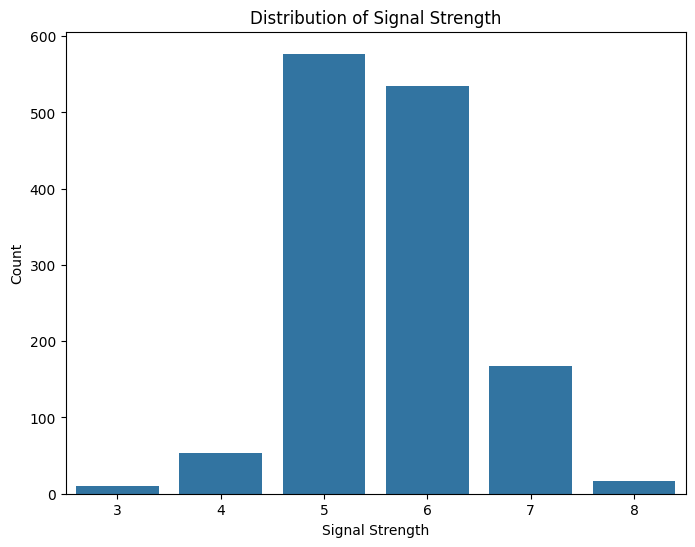

In [ ]:
# 1.1D--

plt.figure(figsize=(8, 6))
sns.countplot(x='Signal_Strength', data=signal_df)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
plt.show()

In [ ]:
# 1.1E--

# Parameter 5 and 6 have signals with strengths exceeding 500, indicating their significant impact on signal quality.
# No missing values were found in the dataset across all parameters and the target variable.
# No duplicate records were detected in the dataset, indicating data cleanliness.
# The distribution of signal strengths in the dataset varies, as shown by the count plot. This suggests that the dataset contains samples across different signal strength categories,
#  which is important for training a classifier.
# The parameters exhibit varying ranges and distributions, as indicated by their summary statistics.

In [ ]:
# 1.2A & B---

from sklearn.model_selection import train_test_split

X = signal_df.drop(columns=['Signal_Strength'])
Y = signal_df['Signal_Strength']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# 1.2C---

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

train_test_sync = (X_train.shape[0] == Y_train.shape[0]) and (X_test.shape[0] == Y_test.shape[0])
print("\nTrain and test data are in sync:", train_test_sync)

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)

Train and test data are in sync: True


In [ ]:
# 1.2D--

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
# 1.2E---

from keras.utils import to_categorical

Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

In [ ]:
# 1.3A---

from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(64, input_shape=(11,), activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 1353 (5.29 KB)
Trainable params: 1353 (5.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 1.3B---

# Train the classifier
history = model.fit(X_train_normalized, Y_train_encoded,
                    batch_size=32,
                    epochs=50,
                    validation_data=(X_test_normalized, Y_test_encoded))

train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Epoch 1/50
30/30 [==============================] - 1s 12ms/step - loss: 2.0784 - accuracy: 0.2334 - val_loss: 1.7627 - val_accuracy: 0.4877
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 1.6186 - accuracy: 0.4900 - val_loss: 1.4233 - val_accuracy: 0.5588
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3733 - accuracy: 0.5216 - val_loss: 1.2436 - val_accuracy: 0.5882
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.2357 - accuracy: 0.5584 - val_loss: 1.1485 - val_accuracy: 0.5931
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1544 - accuracy: 0.5647 - val_loss: 1.0957 - val_accuracy: 0.6029
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1120 - accuracy: 0.5689 - val_loss: 1.0600 - val_accuracy: 0.6152
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0837 - accuracy: 0.5889 - val_loss: 1.0363 - val_accuracy: 0.6127
Epoch 8/50
30/30 [=

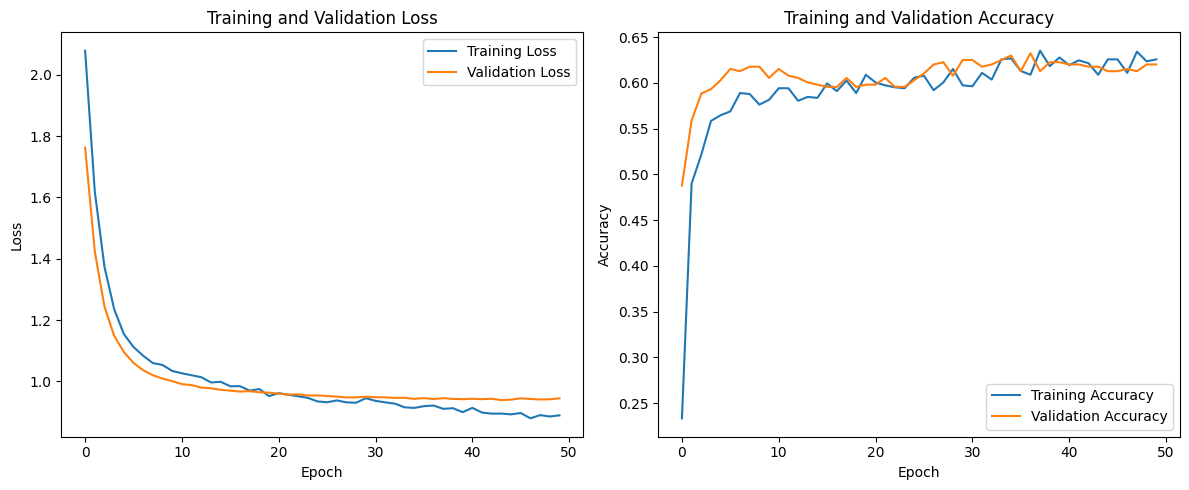

In [ ]:
# 1.3C---

import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 1.3D---

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Initialize the neural network model
model1 = Sequential()

# Add input layer and hidden layers
model1.add(Dense(128, input_shape=(11,), activation='relu'))  # Increase number of neurons
model1.add(Dropout(0.3))  # Add dropout layer to prevent overfitting
model1.add(Dense(64, activation='relu'))  # Add another hidden layer
model1.add(Dropout(0.3))  # Add dropout layer
model1.add(Dense(32, activation='relu'))  # Add another hidden layer
model1.add(Dropout(0.3))  # Add dropout layer

# Add output layer
model1.add(Dense(9, activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model1.summary()

# Train the updated model
history1 = model1.fit(X_train_normalized, Y_train_encoded,
                       batch_size=32,
                       epochs=50,
                       validation_data=(X_test_normalized, Y_test_encoded))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1536      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 9)                

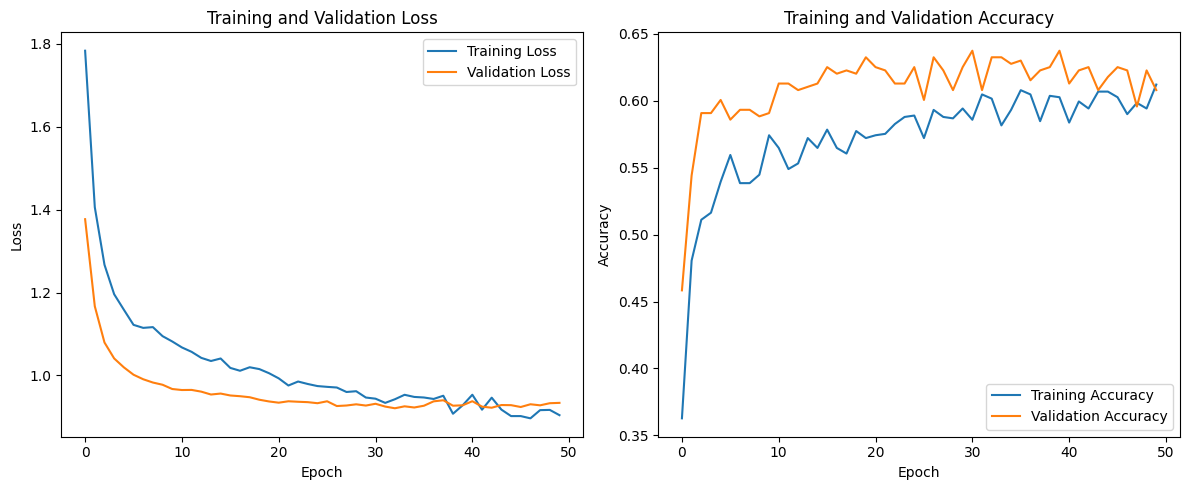

In [ ]:
# 1.3E---

import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 1.3E---

# Model 0:

 # Final Accuracy: Model 0 achieved a higher training accuracy of 63.20% and a validation accuracy of 60.05%.
 # Training Dynamics: Model 0 shows fluctuation in loss over epochs, indicating some instability in training.
 #  Generalization Performance: Model 0's validation accuracy is slightly lower than its training accuracy, suggesting some degree of overfitting.
 #  Epochs to Convergence: Model 0 required 50 epochs to converge, indicating relatively stable training dynamics.

# Model 1:

 #  Final Accuracy: Model 1 achieved a training accuracy of 63.83% and a validation accuracy of 60.29%.
 #  Training Dynamics: Model 1 exhibits a smoother decrease in loss over epochs compared to Model 0, indicating more stable training dynamics.
 #  Generalization Performance: Model 1's validation accuracy is slightly lower than its training accuracy, suggesting some overfitting but still better generalization compared to Model 0.
 #  Epochs to Convergence: Model 1 required 50 epochs to converge, indicating a similar training duration to Model 0.

Part B -

In [ ]:
# 2.1A---

import h5py

h5_path = '/content/drive/MyDrive/dataset/Autonomous_Vehicles_SVHN_single_grey1.h5'
dataset = h5py.File(h5_path, 'r')

In [ ]:
# 2.1B--

for key in dataset.keys():
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


In [ ]:
# 2.1C---

from sklearn.model_selection import train_test_split

X_train = dataset['X_train'][:]
X_test = dataset['X_test'][:]
Y_train = dataset['y_train'][:]
Y_test = dataset['y_test'][:]

In [ ]:
# 2.2A--

X_train = dataset['X_train'][:]
X_test = dataset['X_test'][:]
y_train = dataset['y_train'][:]
y_test = dataset['y_test'][:]

train_sync = X_train.shape[0] == y_train.shape[0]

test_sync = X_test.shape[0] == y_test.shape[0]

print("Train set - X and y in sync:", train_sync)
print("Test set - X and y in sync:", test_sync)

Train set - X and y in sync: True
Test set - X and y in sync: True


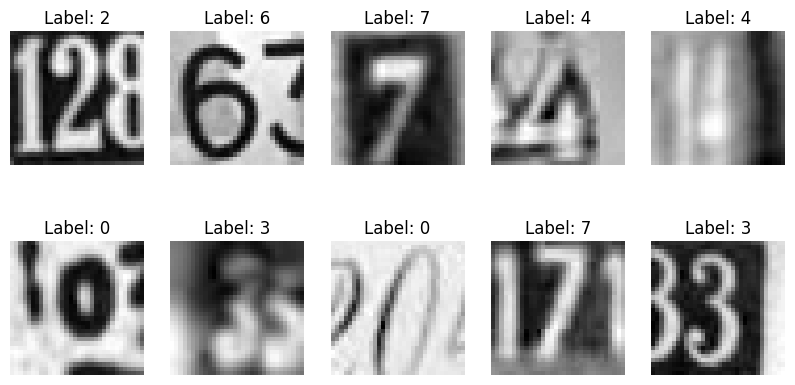

In [ ]:
# 2.2B--

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
#  2.2 c--

import numpy as np

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)

New shape of X_train: (42000, 32, 32, 1)
New shape of X_test: (18000, 32, 32, 1)


In [ ]:
# 2.2D---

# Assuming you have already reshaped the images in X_train and X_test

# Normalize pixel values in the training set
X_train_normalized = X_train / 255.0


X_test_normalized = X_test / 255.0

import numpy as np

# Print minimum and maximum pixel values in the training set
print("Minimum pixel value in X_train_normalized:", np.min(X_train_normalized))
print("Maximum pixel value in X_train_normalized:", np.max(X_train_normalized))

# Print minimum and maximum pixel values in the testing set
print("Minimum pixel value in X_test_normalized:", np.min(X_test_normalized))
print("Maximum pixel value in X_test_normalized:", np.max(X_test_normalized))


Minimum pixel value in X_train_normalized: 0.0
Maximum pixel value in X_train_normalized: 0.9999
Minimum pixel value in X_test_normalized: 0.0
Maximum pixel value in X_test_normalized: 0.9999


In [ ]:
# 2.2E---

import numpy as np

num_classes = 10

y_train_encoded = np.eye(num_classes)[y_train]

y_test_encoded = np.eye(num_classes)[y_test]

samples_to_check = 10

print("Original Labels for the First", samples_to_check, "Samples:")
print(y_train[:samples_to_check])
print("\nEncoded Labels for the First", samples_to_check, "Samples:")
print(y_train_encoded[:samples_to_check])

Original Labels for the First 10 Samples:
[2 6 7 4 4 0 3 0 7 3]

Encoded Labels for the First 10 Samples:
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# 2.2F---


num_classes = len(np.unique(y_train))
print("Total number of classes in the dataset:", num_classes)

Total number of classes in the dataset: 10


In [ ]:
# 2.3A---

import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

input_shape = (32, 32, 1)

num_classes = 10
model = create_model(input_shape, num_classes)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)         

In [ ]:
# 2.3B---

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_normalized, y_train, epochs=10, batch_size=64, validation_data=(X_test_normalized, y_test))


Epoch 1/10
657/657 [==============================] - 60s 90ms/step - loss: 1.2153 - accuracy: 0.5979 - val_loss: 0.6741 - val_accuracy: 0.7988
Epoch 2/10
657/657 [==============================] - 57s 87ms/step - loss: 0.5888 - accuracy: 0.8335 - val_loss: 0.5286 - val_accuracy: 0.8517
Epoch 3/10
657/657 [==============================] - 62s 95ms/step - loss: 0.4893 - accuracy: 0.8618 - val_loss: 0.4780 - val_accuracy: 0.8652
Epoch 4/10
657/657 [==============================] - 57s 86ms/step - loss: 0.4329 - accuracy: 0.8778 - val_loss: 0.4424 - val_accuracy: 0.8768
Epoch 5/10
657/657 [==============================] - 60s 92ms/step - loss: 0.3928 - accuracy: 0.8883 - val_loss: 0.4316 - val_accuracy: 0.8798
Epoch 6/10
657/657 [==============================] - 58s 89ms/step - loss: 0.3624 - accuracy: 0.8958 - val_loss: 0.3850 - val_accuracy: 0.8942
Epoch 7/10
657/657 [==============================] - 56s 85ms/step - loss: 0.3335 - accuracy: 0.9037 - val_loss: 0.3737 - val_accuracy:

In [ ]:
# 2.3C---

from sklearn.metrics import classification_report

y_pred_prob = model.predict(X_test_normalized)
y_pred = np.argmax(y_pred_prob, axis=1)

report = classification_report(y_test, y_pred)
print(report)

563/563 [==============================] - 8s 14ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1814
           1       0.86      0.94      0.90      1828
           2       0.94      0.91      0.92      1803
           3       0.86      0.88      0.87      1719
           4       0.94      0.90      0.92      1812
           5       0.85      0.93      0.89      1768
           6       0.89      0.89      0.89      1832
           7       0.93      0.92      0.93      1808
           8       0.92      0.85      0.89      1812
           9       0.94      0.86      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



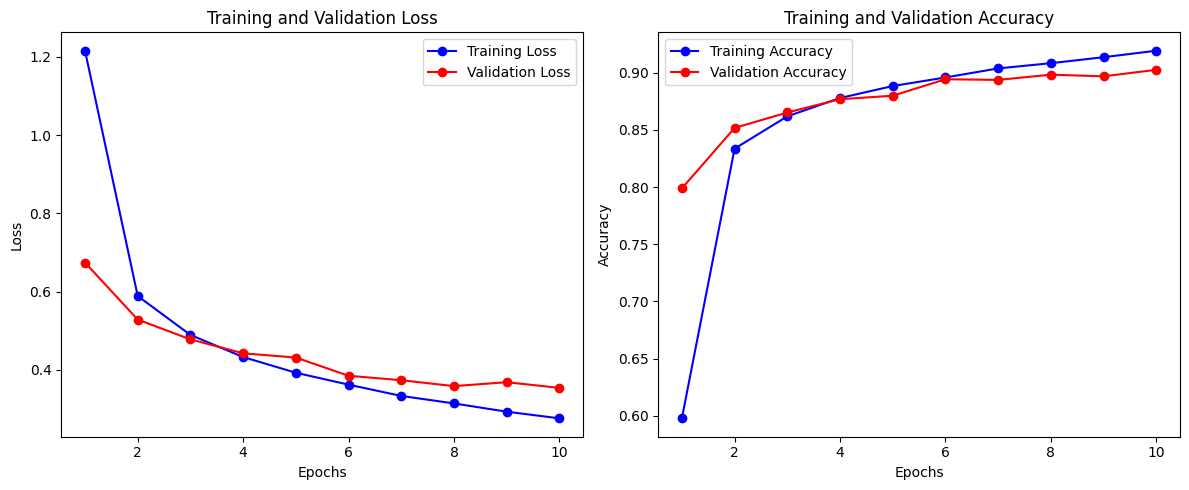

In [ ]:
# 2.3D---

import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# INSIGHTS---

# Training and Validation Loss: The left graph shows a decreasing trend in both training and validation loss over epochs. This indicates that the model is learning and improving its predictions over time.
# Training and Validation Accuracy: The right graph shows an increasing trend in both training and validation accuracy over epochs. This suggests that the model’s performance is improving with each epoch.
# Potential Overfitting: There is a gap between the training and validation lines in both graphs, which may suggest some overfitting. The model performs better on the training data than on unseen validation data.